### Read Processed ROSY

This notebook opens an hdf5 file of processed ROSY output. The hdf5 file contains three dataframes with the following columns:

```
df_coincidences {'A_time [s]', 'A_coincidences [mV]', 'B_time [s]', 'B_coincidences [mV]', 'C_time [s]', 'C_coincidences [mV], Sum_amplitude [mV]', 'mean_timestamp [s]'}
df_amplitudes {'Channel_A_amplitudes', 'Channel_B_amplitudes', 'Channel_C_amplitudes', 'Channel_D_amplitudes'}
df_countrates {'Channel_A_countrate', 'Channel_B_countrate', 'Channel_C_countrate', 'Channel_D_countrate', 'Coincidence_countrate'}
```

This notebook also provides examples for plotting the data from these dataframes.

### Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py

### Read data from file

In [ ]:
from pathlib import Path

FILENAME = Path("data/neutron_detection/processed_2025-03-18 ROSY.h5")

In [4]:
with pd.HDFStore(FILENAME) as store:
    # Read the DataFrames using their keys
    df_coincidences = store['coincidences']
    df_amplitudes = store['amplitudes']
    df_countrates = store['countrates']

### Plot data

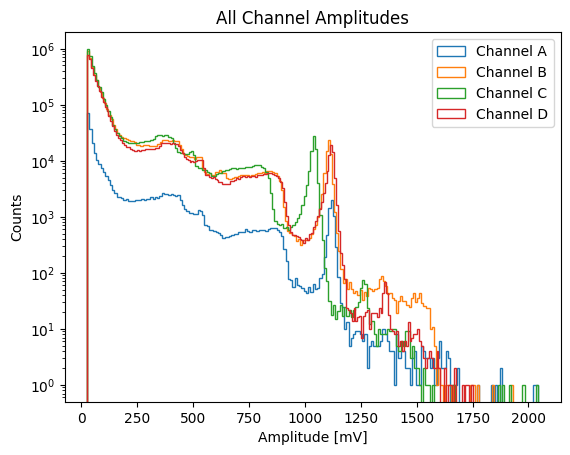

In [ ]:
# Plotting amplitudes (analagous to energy, but uncalibrated)
plt.hist(df_amplitudes["Channel_A_amplitudes"], bins = 200, histtype = "step", label = "Channel A")
plt.hist(df_amplitudes["Channel_B_amplitudes"], bins = 200, histtype = "step", label = "Channel B")
plt.hist(df_amplitudes["Channel_C_amplitudes"], bins = 200, histtype = "step", label = "Channel C")
plt.hist(df_amplitudes["Channel_D_amplitudes"], bins = 200, histtype = "step", label = "Channel D")
plt.xlabel("Amplitude [mV]")
plt.ylabel("Counts")
plt.title("All Channel Amplitudes")
plt.yscale("log")
plt.legend()
plt.show()

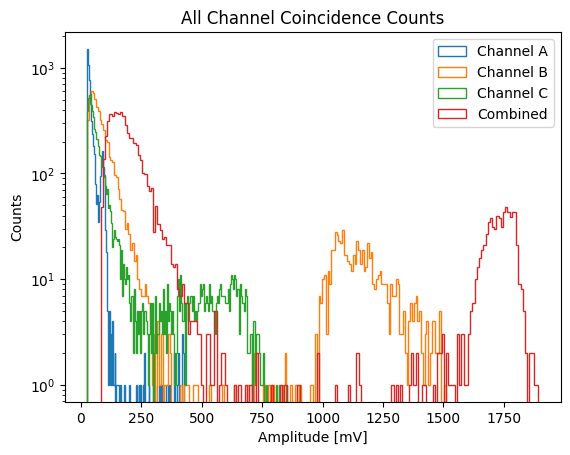

In [43]:
# Plotting coincidences. The separate channels show energy deposited in an individual diamond by a given
# coincidence event, and the combined plot shows the total energy of a coincidence event found by
# summing the energy deposited in each diamond by the particle
plt.hist(df_coincidences["A_coincidences [mV]"], bins = 200, histtype = "step", label = "Channel A")
plt.hist(df_coincidences["B_coincidences [mV]"], bins = 200, histtype = "step", label = "Channel B")
plt.hist(df_coincidences["C_coincidences [mV]"], bins = 200, histtype = "step", label = "Channel C")
# Channel D is not included because it was not used to calculate coincidences (14 MeV neutrons do not reach channel D)
plt.hist(df_coincidences["Sum_amplitude [mV]"], bins = 200, histtype = "step", label = "Combined")
plt.xlabel("Amplitude [mV]")
plt.ylabel("Counts")
plt.title("All Channel Coincidence Counts")
plt.yscale("log")
plt.legend()
plt.show()

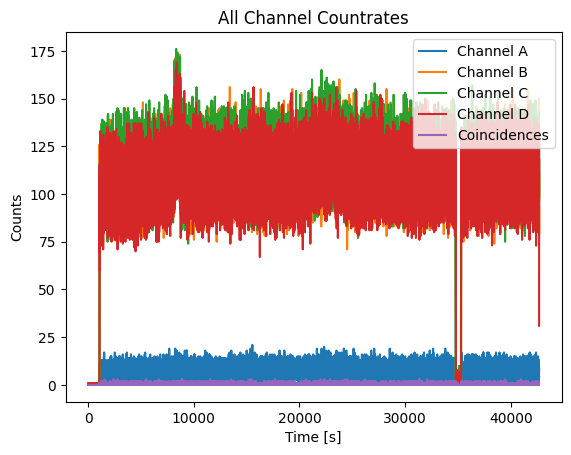

In [44]:
# Plotting countrates
plt.plot(df_countrates["Channel_A_countrate"], label = "Channel A")
plt.plot(df_countrates["Channel_B_countrate"], label = "Channel B")
plt.plot(df_countrates["Channel_C_countrate"], label = "Channel C")
plt.plot(df_countrates["Channel_D_countrate"], label = "Channel D")
plt.plot(df_countrates["Coincidence_countrate"], label = "Coincidences")
plt.xlabel("Time [s]")
plt.ylabel("Counts")
plt.title("All Channel Countrates")
plt.legend()
plt.show()

In [33]:
# Defining a moving average calculation function for clearer countrate viewing
def moving_average(arr, window_size):
    return np.convolve(arr, np.ones(window_size)/window_size, mode='valid')

In [46]:
# Calculate all average countrates
window = 500
avg_Channel_A_countrate = moving_average(df_countrates["Channel_A_countrate"], window)
avg_Channel_B_countrate = moving_average(df_countrates["Channel_B_countrate"], window)
avg_Channel_C_countrate = moving_average(df_countrates["Channel_C_countrate"], window)
avg_Channel_D_countrate = moving_average(df_countrates["Channel_D_countrate"], window)
avg_Coincidence_countrate = moving_average(df_countrates["Coincidence_countrate"], window)

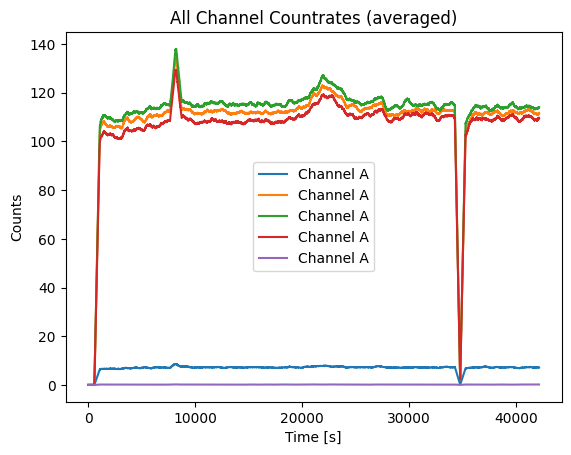

In [47]:
# Note that peaks and dips will probably be broadened, as the averaging window may span across the peak/dip
# A smaller window can correct this, but will give a fuzzier plot
plt.plot(avg_Channel_A_countrate, label = "Channel A")
plt.plot(avg_Channel_B_countrate, label = "Channel A")
plt.plot(avg_Channel_C_countrate, label = "Channel A")
plt.plot(avg_Channel_D_countrate, label = "Channel A")
plt.plot(avg_Coincidence_countrate, label = "Channel A")
plt.xlabel("Time [s]")
plt.ylabel("Counts")
plt.title("All Channel Countrates (averaged)")
plt.legend()
plt.show()